<a href="https://colab.research.google.com/github/chrisroubideaux/dog-breed-identifier/blob/default/ML_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/My Drive/ML demo/dog-breed-identification.zip" -d "drive/My Drive/ML demo/"

# Transfer learning model based on dog breed identifaction

Built with tensorflow, colab, kearas, numpy and pandas

In [ ]:
# Machine learning demo
# Data set provided by kaggle

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub 

In [ ]:
import pandas as pd
import numpy as np
labels_csv = pd.read_csv("drive/MyDrive/ML demo/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     007b8a07882822475a4ce6581e70b1f8  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


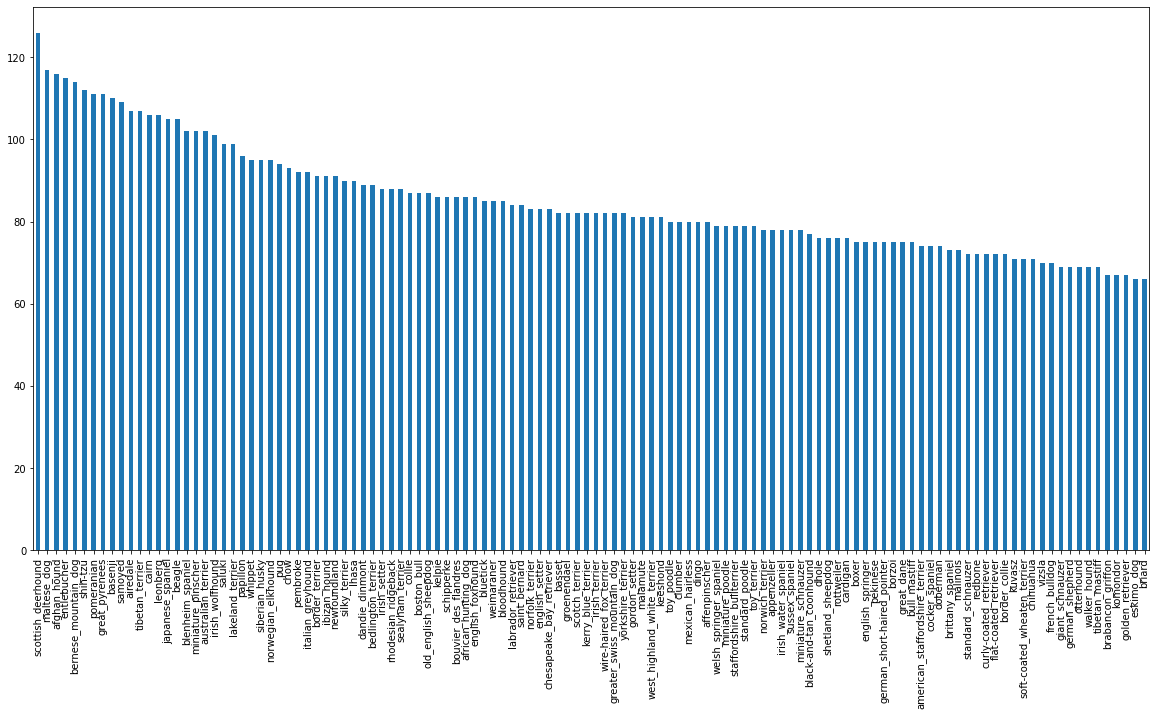

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
# Let's view an image
from IPython.display import Image

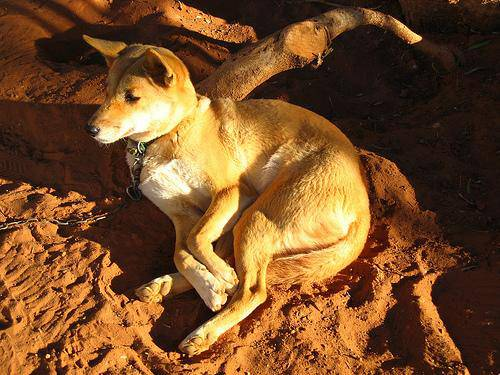

In [ ]:
 Image("drive/My Drive/ML demo/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/ML demo/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# first 10
filenames[:10]

['drive/My Drive/ML demo/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/ML demo/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/ML demo/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/ML demo/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/ML demo/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/ML demo/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/ML demo/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/ML demo/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/ML demo/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/ML demo/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/ML demo/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


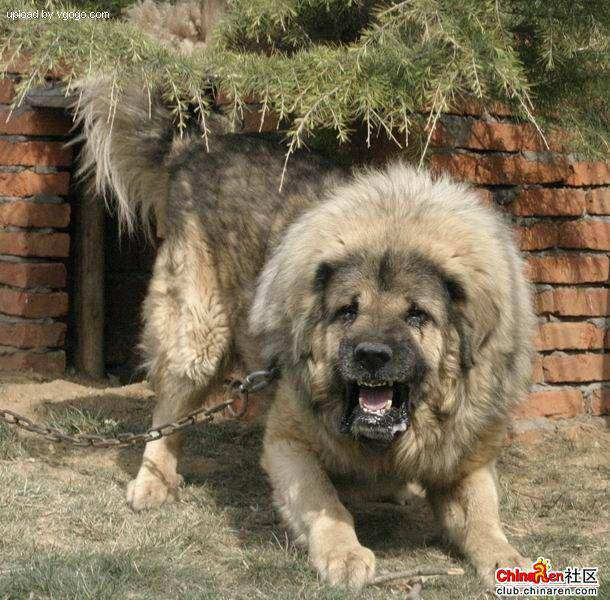

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/My Drive/ML demo/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/ML demo/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/ML demo/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/ML demo/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/ML demo/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/ML demo/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/ML demo/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/ML demo/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/ML demo/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/ML demo/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Training data
X_train[:5], y_train[:2]

(['drive/My Drive/ML demo/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/ML demo/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/ML demo/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/ML demo/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/ML demo/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, Fal


Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

Take an image filepath as input
Use TensorFlow to read the file and save it to a variable, image
Turn our image (a jpg) into Tensors
Normalize our image (convert color channel values from from 0-255 to 0-1).
Resize the image to be a shape of (224, 224)
Return the modified image
Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
    
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

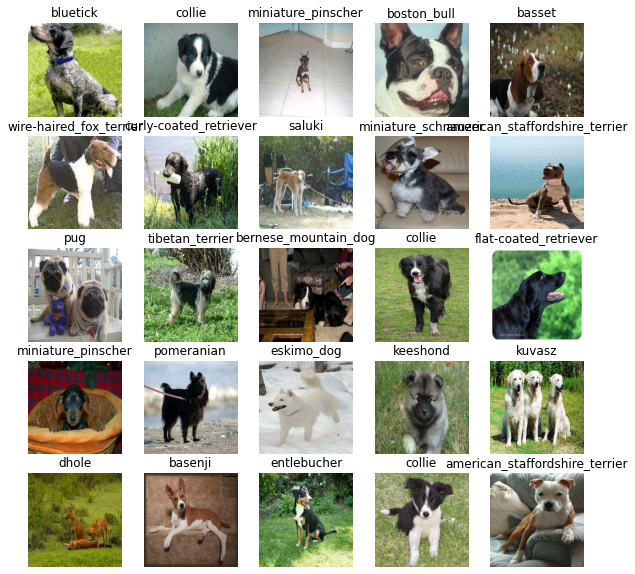

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [ ]:
IMG_SIZE

224

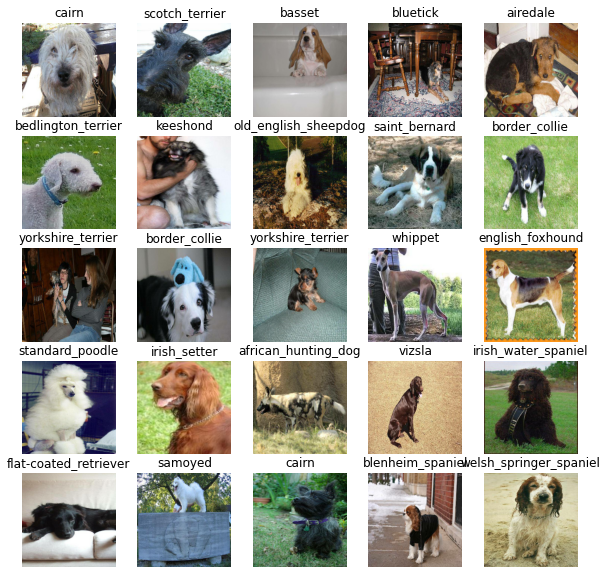

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
INPUT_SHAPE

[None, 224, 224, 3]

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/ML demo/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

Training a model (on a subset of data)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 10s 211ms/step - loss: 4.6073 - accuracy: 0.1037 - val_loss: 3.3911 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 5s 194ms/step - loss: 1.6331 - accuracy: 0.7063 - val_loss: 2.1652 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 5s 180ms/step - loss: 0.5675 - accuracy: 0.9350 - val_loss: 1.6859 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 5s 199ms/step - loss: 0.2570 - accuracy: 0.9900 - val_loss: 1.5156 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 5s 199ms/step - loss: 0.1481 - accuracy: 0.9962 - val_loss: 1.4144 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 5s 188ms/step - loss: 0.1000 - accuracy: 1.0000 - val_loss: 1.3747 - val_accuracy: 0.6500
Epoch 7/100
25/25 [=============================

In [ ]:
%tensorboard --logdir drive/My\ Drive/ML\ demo/logs

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 8s 154ms/step


array([[2.7585286e-03, 7.8757002e-05, 5.5223051e-04, ..., 3.5502337e-04,
        4.5050321e-05, 1.0464973e-02],
       [2.0928537e-03, 8.3674960e-05, 1.0524840e-02, ..., 5.4157991e-04,
        9.7308873e-04, 1.6877532e-04],
       [1.5361152e-06, 2.0851983e-05, 5.5680184e-06, ..., 3.7835380e-05,
        1.6859352e-05, 3.2478062e-04],
       ...,
       [5.2711143e-06, 3.2914759e-05, 7.6998549e-06, ..., 8.8066190e-06,
        2.9061153e-04, 4.8034613e-06],
       [1.2952700e-03, 1.4498488e-04, 1.1496352e-04, ..., 9.0215064e-05,
        3.9330607e-05, 6.0300748e-03],
       [1.8974100e-04, 1.0147535e-04, 6.4653903e-04, ..., 5.0882292e-03,
        8.9996500e-04, 7.8103149e-05]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[2.75852857e-03 7.87570025e-05 5.52230515e-04 3.90101122e-05
 4.34816582e-04 1.89191542e-05 3.12908329e-02 1.52098350e-04
 6.30884533e-05 1.50719471e-03 5.68792457e-04 1.81091615e-04
 2.12043786e-04 2.52166265e-05 2.34953171e-04 4.43391706e-04
 1.44907208e-05 1.60774410e-01 2.85616225e-05 3.07200353e-05
 5.96475205e-04 4.09410102e-04 1.25428014e-05 1.57786056e-03
 3.78754412e-05 4.30696091e-04 1.43007323e-01 2.64096801e-04
 5.54107537e-04 1.47046259e-04 1.05936592e-03 1.62412238e-03
 2.08247220e-03 9.58419550e-05 2.03059244e-04 8.45876187e-02
 4.43835916e-06 4.38045739e-04 2.70168293e-05 4.22746147e-04
 7.60264753e-04 2.76990613e-05 4.80772549e-04 2.85516253e-05
 8.44658498e-05 8.46135008e-05 3.40640581e-05 5.40526467e-04
 1.84621749e-04 8.45937466e-05 6.47852503e-05 2.10301849e-04
 3.50110698e-04 6.74332696e-05 4.29378211e-04 2.67501437e-05
 6.47630150e-05 1.68035517e-03 5.62547939e-04 7.77500197e-02
 2.49155739e-04 5.34992396e-05 6.04164496e-04 1.64751618e-05
 1.91052735e-04 1.569046

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

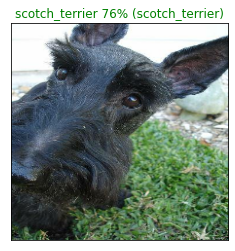

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

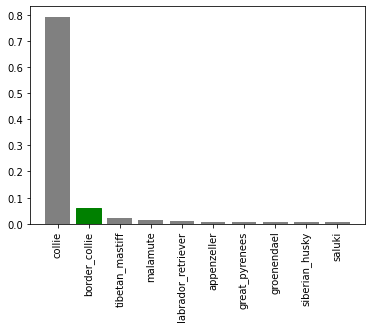

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

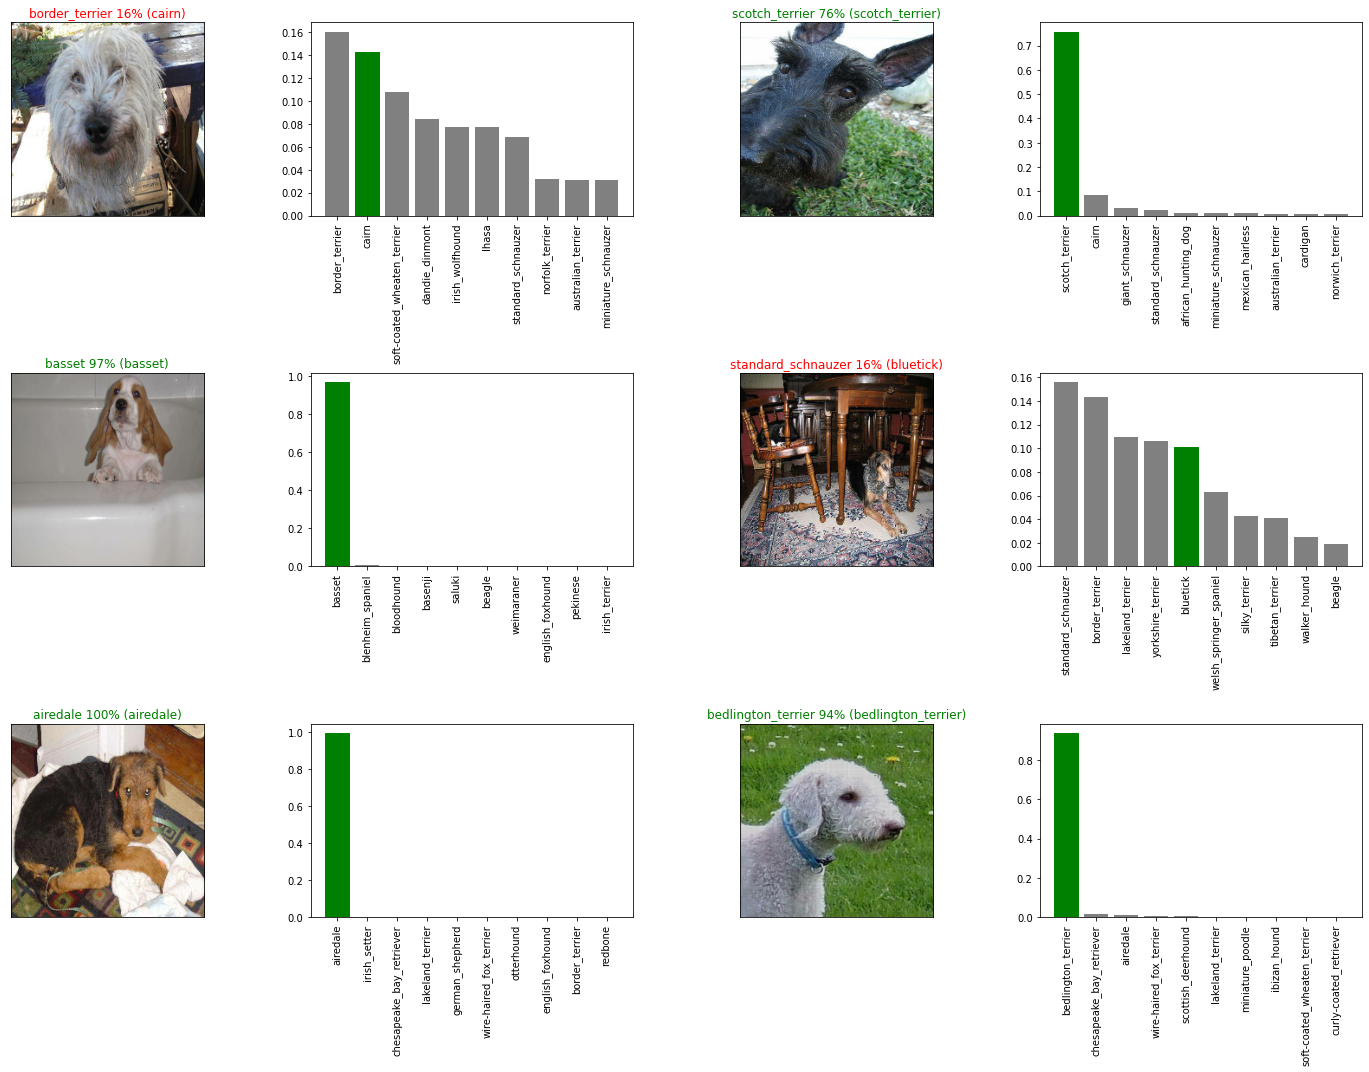

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/ML demo/",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/ML demo/20211126-17351637948154-1000-images-Adam.h5...


'drive/My Drive/ML demo/20211126-17351637948154-1000-images-Adam.h5'

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/ML demo/20211125-14131637849635-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/ML demo/20211125-14131637849635-1000-images-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 110ms/step - loss: 1.2466 - accuracy: 0.6950


[1.246585488319397, 0.6949999928474426]

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 2s 119ms/step - loss: 1.3169 - accuracy: 0.6700


[1.3168652057647705, 0.6700000166893005]

Training a model (With full data)


In [ ]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
%tensorboard --logdir drive/My\ Drive/ML demo/logs

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 46s 130ms/step - loss: 1.3447 - accuracy: 0.6695
Epoch 2/100
320/320 [==============================] - 41s 129ms/step - loss: 0.4027 - accuracy: 0.8784
Epoch 3/100
320/320 [==============================] - 42s 132ms/step - loss: 0.2362 - accuracy: 0.9355
Epoch 4/100
320/320 [==============================] - 42s 132ms/step - loss: 0.1512 - accuracy: 0.9664
Epoch 5/100
320/320 [==============================] - 42s 131ms/step - loss: 0.1073 - accuracy: 0.9763
Epoch 6/100
320/320 [==============================] - 42s 132ms/step - loss: 0.0776 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 42s 132ms/step - loss: 0.0580 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 42s 130ms/step - loss: 0.0463 - accuracy: 0.9938
Epoch 9/100
320/320 [==============================] - 42s 130ms/step - loss: 0.0368 - accuracy: 0.9967
Epoch 10/100
320/320 [==============================] - 42s 131m

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/My Drive/ML demo/20211126-17591637949596-all-images-Adam.h5...


'drive/My Drive/ML demo/20211126-17591637949596-all-images-Adam.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/ML demo/20211125-15231637853796-all-images-Adam.h5')

Loading saved model from: drive/My Drive/ML demo/20211125-15231637853796-all-images-Adam.h5


In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/My Drive/ML demo/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/My Drive/ML demo/test/e1b0cbcf3235fe9a7b35c1652081ff8d.jpg',
 'drive/My Drive/ML demo/test/de85fdcf74dbe025b9b89819735cb9bc.jpg',
 'drive/My Drive/ML demo/test/e06ce40d62d3d198f2df70349104a002.jpg',
 'drive/My Drive/ML demo/test/e2b808864a5253fd356a9032915447a1.jpg',
 'drive/My Drive/ML demo/test/e2686707ac5b5f75ce2ccbc906b624d8.jpg',
 'drive/My Drive/ML demo/test/e2b6d4957b62934bd831c3a1b65e2ebb.jpg',
 'drive/My Drive/ML demo/test/e1dd78810048dc387573f2ec50e4bb16.jpg',
 'drive/My Drive/ML demo/test/e91b757847fad1809a9ffa8c15f5504f.jpg',
 'drive/My Drive/ML demo/test/ef0ec3c95160918de7bd290897ea9f65.jpg',
 'drive/My Drive/ML demo/test/e83fec66a32873298df9fa5fdac113aa.jpg']

In [ ]:
# How many test images are there?
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 46s 141ms/step


In [ ]:
# Check out the test predictions
test_predictions[:10]

array([[3.95783580e-11, 5.72891734e-11, 5.01131865e-08, ...,
        7.80966847e-10, 3.95332447e-11, 1.18402068e-11],
       [5.16895904e-09, 1.27860273e-08, 1.18076243e-02, ...,
        1.34115908e-05, 8.31114466e-09, 1.57624836e-05],
       [1.11235671e-07, 3.69440422e-05, 1.73066217e-09, ...,
        1.07580729e-06, 4.78244601e-07, 1.53752799e-09],
       ...,
       [2.90942513e-11, 6.57582116e-13, 1.75976837e-11, ...,
        3.18741496e-12, 8.81169893e-09, 8.24426638e-12],
       [1.48826718e-09, 5.05678290e-05, 9.63856550e-10, ...,
        1.46251293e-02, 1.48062981e-07, 5.66287128e-10],
       [7.79714426e-09, 1.16224985e-08, 5.09394249e-10, ...,
        8.72147297e-08, 7.64000731e-07, 9.28196631e-10]], dtype=float32)

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/ML demo/test"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1b0cbcf3235fe9a7b35c1652081ff8d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,de85fdcf74dbe025b9b89819735cb9bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e06ce40d62d3d198f2df70349104a002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e2b808864a5253fd356a9032915447a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e2686707ac5b5f75ce2ccbc906b624d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1b0cbcf3235fe9a7b35c1652081ff8d,3.95784e-11,5.72892e-11,5.01132e-08,2.48965e-10,9.69166e-13,8.12228e-08,4.44982e-11,1.03658e-09,2.35757e-11,1.19545e-12,5.9162e-10,1.80459e-09,1.96628e-11,9.77344e-10,1.89712e-09,3.85666e-12,4.32093e-10,7.88181e-10,4.79284e-13,3.55232e-09,2.26574e-08,5.81375e-12,1.21943e-07,1.81105e-07,1.70264e-10,1.40426e-11,3.58854e-07,7.28991e-07,1.95993e-07,2.3691e-08,3.59049e-09,6.28265e-10,3.09298e-09,9.50335e-09,3.06048e-13,7.54424e-14,2.98828e-09,1.18828e-11,2.52652e-11,...,0.000834758,7.99795e-09,1.66804e-12,6.39722e-11,1.82241e-08,5.07564e-08,2.25896e-11,1.72283e-08,1.39509e-08,1.68738e-08,1.62239e-09,2.97738e-12,2.35287e-12,7.36819e-11,1.17711e-09,4.26855e-06,1.57019e-06,2.32905e-09,1.54257e-10,1.01713e-09,1.07038e-08,1.67571e-06,1.35819e-09,1.16913e-09,3.92928e-06,4.08223e-07,3.70094e-05,1.21696e-11,2.20181e-08,6.57976e-10,7.6169e-08,2.92005e-06,6.79135e-10,4.24871e-11,3.61978e-09,7.8875e-14,5.32612e-09,7.80967e-10,3.95332e-11,1.18402e-11
1,de85fdcf74dbe025b9b89819735cb9bc,5.16896e-09,1.2786e-08,0.0118076,1.66238e-07,0.000208877,3.35701e-09,1.29225e-05,4.77273e-06,1.85926e-06,0.00159993,4.12529e-09,2.15771e-08,7.05284e-07,9.88766e-06,1.51262e-06,0.0108431,1.19042e-05,3.82377e-05,1.37003e-09,0.000984261,1.83882e-11,1.3872e-10,4.52894e-06,4.17342e-10,2.46723e-08,1.57758e-12,1.0124e-06,0.22243,1.40916e-05,0.000132949,1.91567e-12,3.41062e-08,2.95715e-07,4.28561e-05,1.57838e-08,2.23659e-07,8.22622e-08,2.45353e-07,5.25041e-08,...,7.3043e-06,1.93837e-05,2.66722e-10,3.54749e-12,1.47851e-06,4.3245e-08,3.89225e-07,2.16462e-10,8.38227e-07,0.000553844,1.72791e-05,9.51456e-11,3.95738e-12,1.94683e-05,3.61363e-09,4.85464e-06,8.54654e-07,1.39949e-10,2.44988e-08,1.96597e-10,6.60634e-06,8.06054e-07,5.35356e-07,2.25487e-06,0.382532,1.94638e-06,9.17609e-08,2.11885e-10,5.99307e-08,8.43844e-05,0.000117287,0.00352018,6.88765e-07,1.36371e-09,1.31659e-06,7.15027e-08,2.79437e-07,1.34116e-05,8.31114e-09,1.57625e-05
2,e06ce40d62d3d198f2df70349104a002,1.11236e-07,3.6944e-05,1.73066e-09,1.25976e-06,4.10398e-07,0.753856,5.65079e-09,8.953e-07,6.51324e-08,1.49431e-08,5.38826e-09,0.228967,1.43056e-07,1.14868e-07,9.62223e-10,1.249e-06,6.98233e-08,3.21703e-10,3.0231e-06,9.80221e-08,8.81007e-09,5.94255e-10,1.49102e-08,2.19135e-08,1.74069e-06,4.41634e-10,3.08234e-10,5.88481e-07,6.42486e-08,5.93191e-08,1.67963e-08,2.18239e-09,2.33464e-07,6.97763e-05,1.5687e-09,5.76858e-11,2.97665e-07,8.00944e-11,1.01737e-06,...,1.24214e-08,2.22031e-08,3.6222e-06,5.49766e-07,2.92109e-06,6.3748e-06,3.01613e-06,2.56598e-07,9.78738e-09,5.41071e-09,6.39252e-08,5.50345e-06,1.02011e-06,0.000134192,5.30718e-07,6.95884e-08,2.94708e-09,9.04425e-09,1.12027e-12,0.00656997,4.85782e-09,8.53218e-08,9.29848e-10,3.46423e-09,2.20358e-08,1.01535e-08,1.2189e-09,2.50906e-08,9.45742e-06,0.000154881,7.27008e-08,4.65918e-10,4.9652e-10,0.000631545,1.71809e-09,2.19118e-05,6.15117e-08,1.0758

In [ ]:
preds_df.to_csv("drive/My Drive/ML demo/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

In [ ]:
# Get custom image filepaths
custom_path = "drive/My Drive/ML demo/dogs"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [ ]:
 # Make predictions on the custom data
 custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)